# Airbnb Vancouver 


Analyzing Airbnb listing data for Vancouver from 2019

This project explores Airbnb data for Vancouver and it aims at answering the main question: 
**"Identifying most important amenities affecting the price for Airbnb"**

This involves a Machine Learning model and their results gives the important amenities that affect the price.

In [47]:
# Import necessary libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
from scipy import stats


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import sklearn.metrics

In [48]:
# Load data
airbnb = pd.read_csv('listings.csv')

In [49]:
airbnb.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,10080,https://www.airbnb.com/rooms/10080,2.019070e+13,2019-07-10,D1 - Million Dollar View 2 BR,"Stunning two bedroom, two bathroom apartment. ...","Bed setup: 2 x queen, option to add up to 2 tw...","Stunning two bedroom, two bathroom apartment. ...",none,NaN,...,f,f,strict_14_with_grace_period,f,f,36,36,0,0,0.17
1,13188,https://www.airbnb.com/rooms/13188,2.019070e+13,2019-07-10,Garden level studio in ideal loc.,Garden level studio suite with garden patio - ...,Very Close (3min walk) to Nat Bailey baseball ...,Garden level studio suite with garden patio - ...,none,The uber hip Main street area is a short walk ...,...,t,f,moderate,f,f,2,2,0,0,1.74
2,13357,https://www.airbnb.com/rooms/13357,2.019070e+13,2019-07-10,! Wow! 2bed 2bath 1bed den Harbour View Apartm...,Very spacious and comfortable with very well k...,"Mountains and harbour view 2 bedroom,2 bath,1 ...",Very spacious and comfortable with very well k...,none,Amanzing bibrant professional neighbourhood. C...,...,f,f,strict_14_with_grace_period,t,t,3,1,2,0,0.49
3,13490,https://www.airbnb.com/rooms/13490,2.019070e+13,2019-07-10,Vancouver's best kept secret,This apartment rents for one month blocks of t...,"Vancouver city central, 700 sq.ft., main floor...",This apartment rents for one month blocks of t...,none,"In the heart of Vancouver, this apartment has ...",...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.83
4,14267,https://www.airbnb.com/rooms/14267,2.019070e+13,2019-07-10,EcoLoft Vancouver,"The Ecoloft is located in the lovely, family r...",West Coast Modern Laneway House Loft: We call ...,"The Ecoloft is located in the lovely, family r...",none,We live in the centre of the city of Vancouver...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.29


In [50]:
# Overall shape of the data
n, m = airbnb.shape
print('Number of observations:',n)
print('Number of features:',m)

Number of observations: 5975
Number of features: 106


In [51]:
airbnb.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       ...
       'instant_bookable', 'is_business_travel_ready', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object', length=106)

In [52]:
# Keep the columns which can affect the price of a home
columns_to_keep = ['host_response_time', 'host_response_rate', 'host_acceptance_rate',
                   'host_is_superhost', 'host_total_listings_count', 'host_has_profile_pic', 
                   'host_identity_verified', 'neighbourhood_cleansed', 'reviews_per_month',
                   'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 
                   'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 
                   'square_feet', 'price', 'security_deposit','cleaning_fee', 'guests_included',
                   'extra_people', 'minimum_nights', 'maximum_nights', 'availability_365', 
                   'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 
                   'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
                   'review_scores_location', 'review_scores_value', 'requires_license', 'license', 
                   'instant_bookable', 'cancellation_policy', 'require_guest_profile_picture', 
                   'require_guest_phone_verification', 'calculated_host_listings_count']

In [53]:
# Make a new data frame with only the important columns
airbnb_df = airbnb[columns_to_keep]

In [54]:
airbnb_df

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,reviews_per_month,latitude,...,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count
0,within a day,83%,NaN,f,37.0,t,t,Downtown,0.17,49.28772,...,9.0,10.0,9.0,t,18-476608,f,strict_14_with_grace_period,f,f,36
1,within an hour,100%,NaN,t,2.0,t,t,Riley Park,1.74,49.24577,...,10.0,10.0,10.0,t,19-162013,t,moderate,f,f,2
2,within an hour,100%,NaN,f,4.0,t,t,Downtown Eastside,0.49,49.27955,...,8.0,8.0,8.0,t,NaN,f,strict_14_with_grace_period,t,t,3
3,within an hour,100%,NaN,t,4.0,t,f,Kensington-Cedar Cottage,0.83,49.25550,...,10.0,10.0,10.0,t,NaN,f,strict_14_with_grace_period,f,f,1
4,within a day,100%,NaN,f,1.0,t,f,Kensington-Cedar Cottage,0.29,49.24974,...,9.0,10.0,9.0,t,18-554072,f,strict_14_with_grace_period,f,f,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5970,within an hour,100%,NaN,t,1.0,t,f,Downtown,NaN,49.27866,...,NaN,NaN,NaN,t,19-265349,t,strict_14_with_grace_period,f,f,1
5971,within an hour,95%,NaN,t,6.0,t,f,Downtown,NaN,49.27415,...,NaN,NaN,NaN,t,Exempt,t,strict_14_with_grace_period,f,f,6
5972,NaN,NaN,NaN,f,1.0,t,t,Mount Pleasant,NaN,49.26440,...,NaN,NaN,NaN,t,NaN,t,flexible,f,f,1
5973,NaN,NaN,NaN,f,0.0,t,f,Mount Pleasant,NaN,49.26440,...,NaN,NaN,NaN,t,19-265401,f,flexible,f,f,1


In [55]:
# Perform an assessment of how much missing data there is in each column of the
# dataset.
missing = airbnb_df.isnull().sum()
missing = missing[missing > 0]/(airbnb_df.shape[0]) * 100
missing.sort_values(inplace=True)

In [56]:
import seaborn as sns
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as style
style.use('fivethirtyeight')
import folium
from folium import plugins
from pyproj import Proj, transform
%matplotlib inline
sns.set_style('whitegrid')

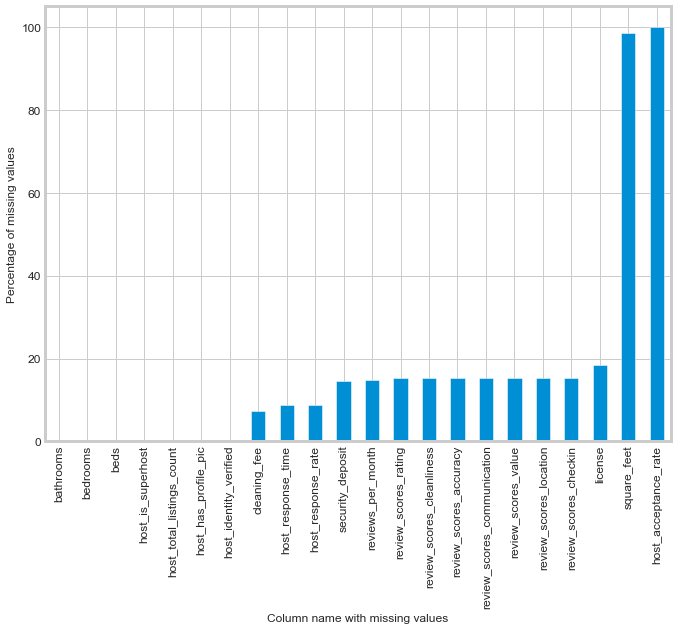

There are 22 columns with missing values.


In [173]:
missing.plot.bar(figsize=(10,8))
plt.xlabel('Column name with missing values')
plt.ylabel('Percentage of missing values')

plt.show()
print("There are {} columns with missing values.".format(len(missing)))

In [58]:
# Remove the columns with more than 20% missing values
for i, col in enumerate(missing.index):
    if missing[i] > 20:
        airbnb_df.drop(columns=col, inplace=True)

In [59]:
# How many features are there of each data type?
dtype={}
for data_type in airbnb_df.dtypes:
    if data_type not in dtype:
        dtype[data_type] = 1
    else:
        dtype[data_type] += 1
    
dtype

{dtype('O'): 21, dtype('float64'): 14, dtype('int64'): 7}

####  We create a data frame with all the features that we would keep in our analysis. Firstly, we add all numeric columns. we deal with the Object columns in the following sections.

In [60]:
airbnb_new = airbnb_df.select_dtypes(exclude=['O'])
airbnb_new.head()

,host_total_listings_count,reviews_per_month,latitude,longitude,accommodates,bathrooms,bedrooms,beds,guests_included,minimum_nights,...,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count
0,37.0,0.17,49.28772,-123.12110,6,2.0,2.0,4.0,1,60,...,315,16,93.0,9.0,9.0,10.0,9.0,10.0,9.0,36
1,2.0,1.74,49.24577,-123.10516,4,1.0,0.0,2.0,1,2,...,261,199,96.0,10.0,10.0,10.0,10.0,10.0,10.0,2
2,4.0,0.49,49.27955,-123.10546,4,2.0,2.0,2.0,2,30,...,313,56,84.0,8.0,9.0,8.0,8.0,8.0,8.0,3
3,4.0,0.83,49.25550,-123.06696,2,1.0,1.0,1.0,1,30,...,302,82,98.0,10.0,10.0,10.0,10.0,10.0,10.0,1
4,1.0,0.29,49.24974,-123.08108,4,1.0,1.0,2.0,2,7,...,0,31,95.0,10.0,9.0,10.0,9.0,10.0,9.0,1


 - We use median to fill in the missing values for numeric columns. 

In [61]:
# Filling missing value of numeric columns; Object columns need to be processed before filling their missing values.
airbnb_new.fillna(airbnb_new.median(), inplace=True)

In [62]:
object_columns = airbnb_df.select_dtypes(include=['O'])
object_columns.head()

,host_response_time,host_response_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,is_location_exact,property_type,room_type,bed_type,...,price,security_deposit,cleaning_fee,extra_people,requires_license,license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,within a day,83%,f,t,t,Downtown,t,Condominium,Entire home/apt,Real Bed,...,$150.00,"$1,500.00",$195.00,$0.00,t,18-476608,f,strict_14_with_grace_period,f,f
1,within an hour,100%,t,t,t,Riley Park,t,Apartment,Entire home/apt,Real Bed,...,$119.00,$0.00,$40.00,$0.00,t,19-162013,t,moderate,f,f
2,within an hour,100%,f,t,t,Downtown Eastside,t,Apartment,Entire home/apt,Real Bed,...,$151.00,$787.00,$197.00,$33.00,t,NaN,f,strict_14_with_grace_period,t,t
3,within an hour,100%,t,t,f,Kensington-Cedar Cottage,t,Apartment,Entire home/apt,Real Bed,...,$146.00,$0.00,$40.00,$0.00,t,NaN,f,strict_14_with_grace_period,f,f
4,within a day,100%,f,t,f,Kensington-Cedar Cottage,t,House,Entire home/apt,Real Bed,...,$140.00,$0.00,$75.00,$15.00,t,18-554072,f,strict_14_with_grace_period,f,f


In [63]:
# True or False columns
for col in object_columns:
    airbnb_new[col] = airbnb_df[col].map(lambda s: False if s == "f" else True)

In [64]:
bool_columns = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'cancellation_policy', 
                'require_guest_phone_verification', 'host_has_profile_pic','is_location_exact', 'requires_license',
                'instant_bookable'  ]

In [65]:
# Filling missing values of boolean columns with median
for col in bool_columns:
    airbnb_new[col] = airbnb_new[col].fillna(airbnb_new[col].median())

In [66]:
# Getting dummy variables of categorical features
categorical_columns = ['neighbourhood_cleansed', 'property_type', 
                       'room_type', 'bed_type','cancellation_policy']

for col in categorical_columns:
    airbnb_new = pd.concat([airbnb_new, pd.get_dummies(airbnb_df[col])], axis=1)

 - Parsing amenities column: The values are strings of various amenities of Airbnb homes which are comma separated. There are other special characters which needed to be removed. Once we remove the unnecessary characters we will create a list of all available amenities across all rows. The next step is to check every row and encode presence or absence of the amenities by 1 and 0. Finally we will concatenate all the columns to the existing features data frame

In [67]:
# removing unnecessary characters from amenities
amenities = np.array(airbnb_df['amenities'].map(lambda amns: amns.replace('"',"").replace('{',"").replace('}',"").split(',')))
# Create an array of all unique amenities across all rows
all_amenities = np.unique(np.concatenate(amenities))[1:]

In [68]:
def available_amenties(all_amenities, amenities):
    amenties_bool = np.empty((amenities.shape[0], all_amenities.shape[0]))
    for i, row in enumerate(amenities):
        amns = all_amenities.copy()
        for j, amn in enumerate(amns):
            if amn in amenities[i]:
                amenties_bool[i,j] = True
            else:
                amenties_bool[i,j] = False
    return amenties_bool

amenities = available_amenties(all_amenities, amenities)

In [69]:
# Reset index of the train data frame and drop the old index
airbnb_new = airbnb_new.reset_index(drop=True)

In [70]:
# Combine the train data frame and the amenities data frame
airbnb_new = pd.concat([airbnb_new, pd.DataFrame(data=amenities, columns=all_amenities)], axis=1)

 - Parsing price related columns

In [71]:
# For extra_people and price we only parse the data and convert them to float
airbnb_new['extra_people'] = np.array(airbnb_df['extra_people'].map(lambda exp: float(exp.replace('$',"").replace(',',""))))
airbnb_new['price'] = np.array(airbnb_df['price'].map(lambda price: float(price.replace('$',"").replace(',',""))))

 - For cleaning_fee column, we need to convert everything to string, then parse and then fill the missing values with the average. 

In [72]:
airbnb_new['cleaning_fee'] = airbnb_df['cleaning_fee'].astype('str')

In [73]:
airbnb_new['cleaning_fee'] = airbnb_new['cleaning_fee'].map(lambda cfee: np.nan if cfee == 'nan' else float(cfee.replace('$',"").replace(',',"")))

In [74]:
airbnb_new['cleaning_fee'] = airbnb_new['cleaning_fee'].fillna(airbnb_new['cleaning_fee'].mean())

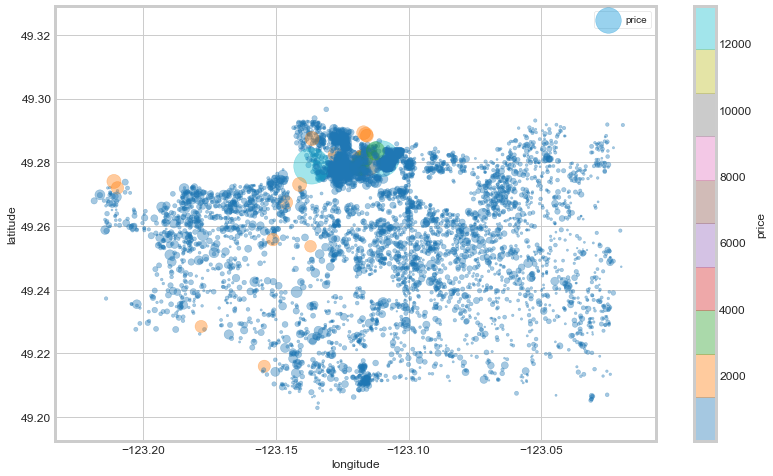

In [75]:
airbnb_new.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=airbnb_new["price"]/10, label="price", figsize=(12,8),
    c="price", cmap=plt.get_cmap("tab10"), colorbar=True,
    sharex=False)

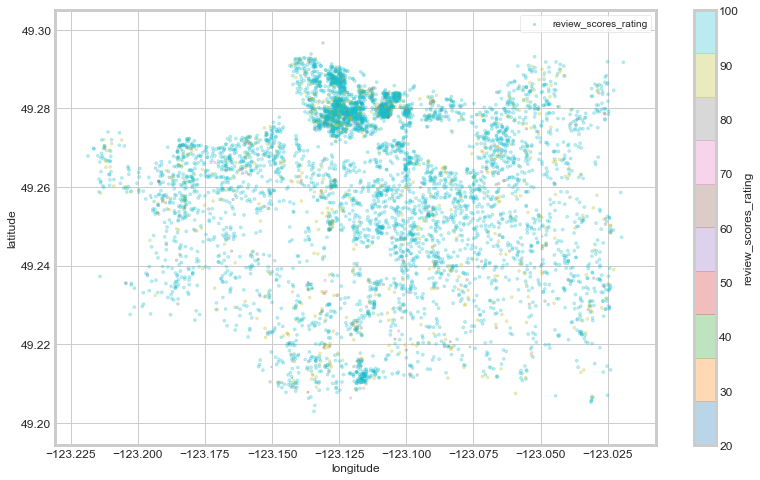

In [76]:

airbnb_new.plot(kind="scatter", x="longitude", y="latitude", alpha=0.3,
    s=airbnb_new["review_scores_rating"]/10, label="review_scores_rating", figsize=(12,8),
    c="review_scores_rating", cmap=plt.get_cmap("tab10"), colorbar=True,
    sharex=False)
plt.legend()
plt.show()

#### Looking at the price map shows few important points:
 - The distribution of Airbnb listings are denser in downtown area.
 - Outside of downtown area, Kitsilano beach has the highest density of listings followed by East side.
 - South Vancouver has the lowest density of Airbnb listings.
 - Most of listings are in the range of $0.0 to $ 1500 there are few listings with extreme price values.
 - It is best to only take the data whose price are less than $700.
 - It is not obvious from the two plots above that whether the expensive listings have a high review. We can  evaluate this hypothesis by a scatter plot of price and review rating.

In [77]:
number_outlier = len(airbnb_new[airbnb_new['price'] > 700])
price_outlier = len(airbnb_new[airbnb_new['price'] > 700]) / airbnb_new.shape[0] * 100
print('There are {} instances of outlier in the price column. They make {:.2} % of the whole column.'.format(number_outlier, price_outlier))

There are 97 instances of outlier in the price column. They make 1.6 % of the whole column.


In [78]:
# Querying only the rows with a price less than $700.
airbnb_new = airbnb_new.query('price <= 700')

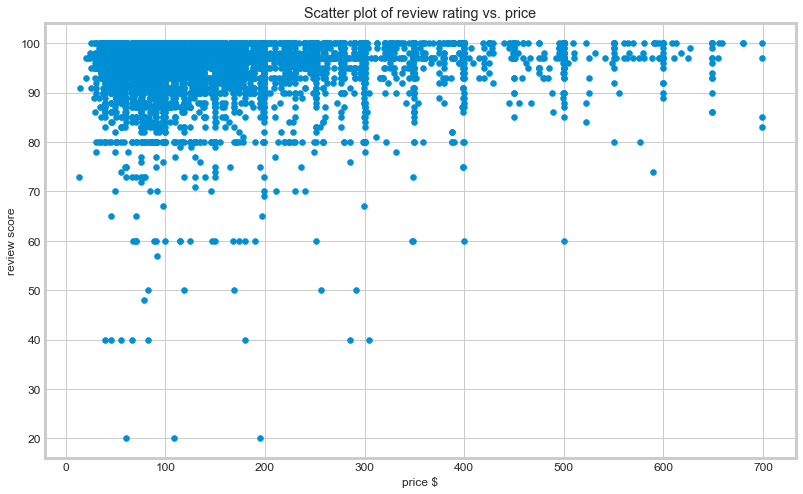

In [180]:
# Scatter plot of review rating versus price
plt.figure(figsize=(12,8))
plt.scatter(airbnb_new['price'],airbnb_new['review_scores_rating'])
plt.xlabel('price $')
plt.ylabel('review score')
plt.title('Scatter plot of review rating vs. price')
plt.show()

It seems that a high price does not lead to a high review score. There many listings with a price in the range \$100 - $300 with a very high review score. Also, there are some expensive listings with a low review rating. This answers the third questions that we asked.

In [80]:
from mpl_toolkits.basemap import Basemap

In [81]:
#Plot price on their corresponding longitude and latitude [2]
import matplotlib.image as mpimg
vancouver_img=mpimg.imread('/Users/kirandarshak/Documents/100DaysOfCode/Python/van.png')

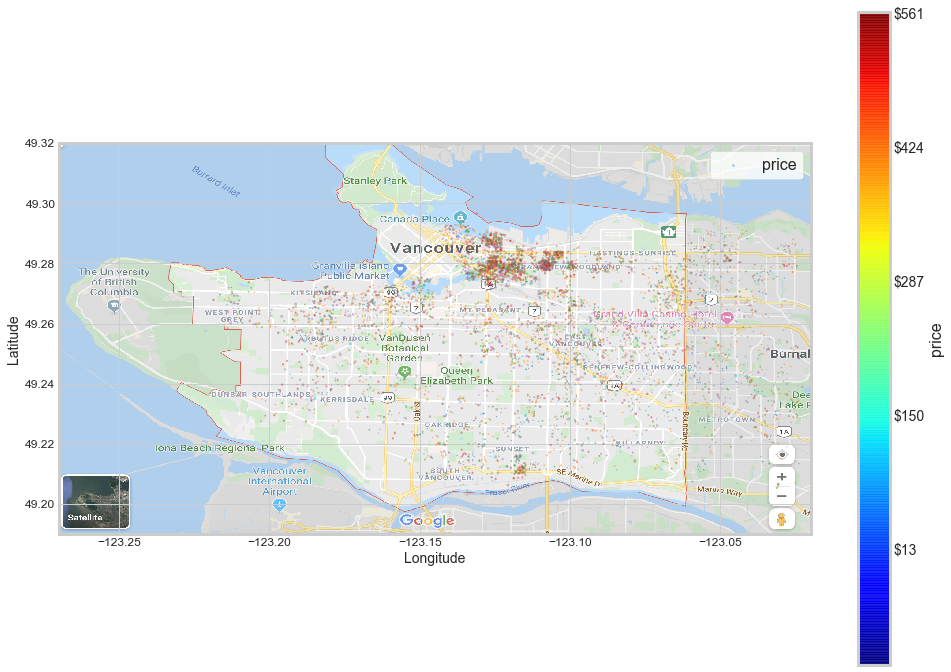

In [82]:
import matplotlib.image as mpimg
vancouver_img=mpimg.imread('/Users/kirandarshak/Documents/100DaysOfCode/Python/van.png')

ax = airbnb_new.plot(kind="scatter", x="longitude", y="latitude", figsize=(15,12),
                       s=airbnb_new['price']/100, label="price",
                       c="price", cmap=plt.get_cmap("tab10"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(vancouver_img, extent=[-123.27, -123.02, 49.19, 49.32], alpha=0.9,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = airbnb_new["price"]
tick_values = np.linspace(prices.min(), prices.max(), 6)
cbar = plt.colorbar()
cbar.ax.set_yticklabels(["$%d"%v for v in tick_values], fontsize=14)
cbar.set_label('price', fontsize=16)

plt.legend(fontsize=16)

plt.show()

###  Data preprocessing and feature engineering

In [128]:
airbnb_new.columns

Index(['host_total_listings_count', 'reviews_per_month', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'guests_included', 'minimum_nights',
       'maximum_nights', 'availability_365',
       ...
       'Wide entrance', 'Wide entrance for guests', 'Wide entryway',
       'Wide hallways', 'Wifi', 'Window guards', 'Wine cooler',
       'translation missing: en.hosting_amenity_49',
       'translation missing: en.hosting_amenity_50', 'bed_bath_bathroom'],
      dtype='object', length=283)

In [129]:
#Remove these columns as they are not needed for our model
airbnb_data.drop(columns=['id', 'latitude', 'longitude' ], inplace=True)

In [130]:
#Create a new feature by adding number of bathrooms, bedrooms, and beds 
airbnb_new['bed_bath_bathroom'] = airbnb_new['bathrooms'] + airbnb_new['bedrooms'] + airbnb_new['beds']

 - Feature scaling: We have two options: (1) minmaxscaler and (2) StandardScaler. We choose the later one as it is less susceptible to outliers in the data in case they have not been caught. 

In [131]:
#Create a pipeline for feature scaling
scl_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

In [132]:
X = scl_pipeline.fit_transform(airbnb_new.drop(columns=['price']))

In [133]:
# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, airbnb_new['price'], test_size=0.2, random_state=42)

### 5. Model training and model selection

Here we test three models:
 - Linear model
 - Decision Tree
 - Random Forest
 
We measure each model's room mean square error (RMSE). Then we perform a 10 fold cross validation to see which model would perform better on unseen data.

**Linear regression model**

In [134]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [135]:
# let's try the model on a few training instances
some_data = X_train[:5]
some_labels = y_train[:5]


print("Predictions:", lin_reg.predict(some_data))

Predictions: [164.484375  196.0390625 168.0390625  74.8828125 173.9453125]


Compare against the actual values:

In [136]:
print("Labels:", list(some_labels))

Labels: [140.0, 105.0, 352.0, 91.0, 150.0]


In [137]:
airbnb_predictions = lin_reg.predict(X_train)
lin_mse = mean_squared_error(y_train, airbnb_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse
print('Linear model RMSE: {:.4}'.format(lin_rmse))

Linear model RMSE: 73.16


**Decision Tree model**

In [138]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [139]:
airbnb_predictions = tree_reg.predict(X_train)
tree_mse = mean_squared_error(y_train, airbnb_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse
print('Decision Tree model RMSE: {:.4}'.format(tree_rmse))

Decision Tree model RMSE: 0.6088


### It seems that the Decsion Tree model is Overfit

**Random Forest model** 

In [140]:
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [141]:
airbnb_predictions = forest_reg.predict(X_train)
forest_mse = mean_squared_error(y_train, airbnb_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse
print('Random Forest model RMSE: {:.4}'.format(forest_rmse))

Random Forest model RMSE: 31.31


In [142]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation:", scores.std())

In [143]:
lin_scores = cross_val_score(lin_reg, X_train, y_train,scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [6.16068688e+14 7.23048862e+01 1.59390139e+14 1.64699866e+15
 2.30989747e+14 6.34552016e+13 2.33926543e+15 1.61449420e+14
 6.94990269e+14 2.81412913e+12]
Mean:  591542168540122.2
Standard deviation: 752127645830728.0


In [144]:
tree_scores = cross_val_score(tree_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)
display_scores(tree_rmse_scores)

Scores: [106.39969909 112.84669574 104.32019834 107.33460309 103.26265828
 111.22699619  97.47313869 100.58939075  98.86098127 106.56181904]
Mean:  104.88761804838252
Standard deviation: 4.768058085433483


In [145]:
forest_scores = cross_val_score(forest_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [73.79592449 73.54760897 81.44341379 85.33050398 76.79303702 78.55471946
 72.53010358 76.18277409 70.26558008 69.83940137]
Mean:  75.82830668322607
Standard deviation: 4.661888855341614


#### As shown above during training each model, the Decision Tree provides the lowest error. However, after cross validation, the Random Forest model generates the lowest error on average which makes it the best model out of the three tested ones.

#### Fine tuning the model
Now we use the Grid Search CV to find the optimal parameters of the Random Forest model.

In [146]:
param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],
  

In [147]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [148]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=8, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

Let's see the score of each hyperparameter combination tested during the grid search:

In [149]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

103.76475853399009 {'max_features': 2, 'n_estimators': 3}
87.56439543782585 {'max_features': 2, 'n_estimators': 10}
83.02160641698178 {'max_features': 2, 'n_estimators': 30}
97.45629496515988 {'max_features': 4, 'n_estimators': 3}
83.7006623813971 {'max_features': 4, 'n_estimators': 10}
80.1630351003981 {'max_features': 4, 'n_estimators': 30}
92.72742868818001 {'max_features': 6, 'n_estimators': 3}
82.00438901986331 {'max_features': 6, 'n_estimators': 10}
77.67183354151139 {'max_features': 6, 'n_estimators': 30}
90.97486217108845 {'max_features': 8, 'n_estimators': 3}
80.04090171608578 {'max_features': 8, 'n_estimators': 10}
76.88451211722274 {'max_features': 8, 'n_estimators': 30}
98.82672733694663 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
84.90220125429633 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
95.98130997098302 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
83.47718495102328 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}

In [150]:
pd.DataFrame(grid_search.cv_results_).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.015577,0.003739,0.001957,0.000817,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-9877.879627,-12035.544048,...,-10767.125114,1171.984835,18,-2589.378812,-2564.776515,-2459.356394,-2697.757150,-2877.135271,-2637.680828,141.700615
1,0.036612,0.001363,0.003170,0.000073,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-7151.056901,-8591.865821,...,-7667.523348,662.544046,11,-1417.311583,-1406.723399,-1262.118014,-1382.635571,-1402.504286,-1374.258571,57.185708
2,0.098274,0.000816,0.007166,0.000195,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-6254.725960,-7684.640060,...,-6892.587132,639.368908,7,-1053.532757,-1043.340086,-968.762964,-1038.253129,-1065.881235,-1033.954034,33.938557
3,0.015627,0.001014,0.001574,0.000178,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-8809.583016,-10170.573420,...,-9497.729428,836.401120,16,-2349.913751,-2290.357101,-2505.337885,-2450.244100,-2536.756703,-2426.521908,93.097879
4,0.041180,0.000759,0.003161,0.000009,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-6262.330422,-7785.334329,...,-7005.800883,632.972644,9,-1271.669621,-1244.695921,-1264.354879,-1269.221607,-1317.412461,-1273.470898,23.930161


### Evaluating the model on test set

In [151]:
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(X_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [152]:
final_rmse

74.05087018930028

 - Confidence interval for test set RMSE

In [153]:
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
mean = squared_errors.mean()
m = len(squared_errors)

np.sqrt(stats.t.interval(confidence, m - 1,
                         loc=np.mean(squared_errors),
                         scale=stats.sem(squared_errors)))

array([68.30789855, 79.37942899])

### Results and Interpretation

Feature importance

In [154]:
feature_importances = grid_search.best_estimator_.feature_importances_
attributes = airbnb_new.drop(columns='price').columns
features = sorted(zip(feature_importances, attributes), reverse=True)

In [155]:
#Create list of all attributes and their coefficient for plotting purposes
attribute = []
coefficient = []
for feature in features:
    attribute.append(feature[1]) 
    coefficient.append(feature[0])

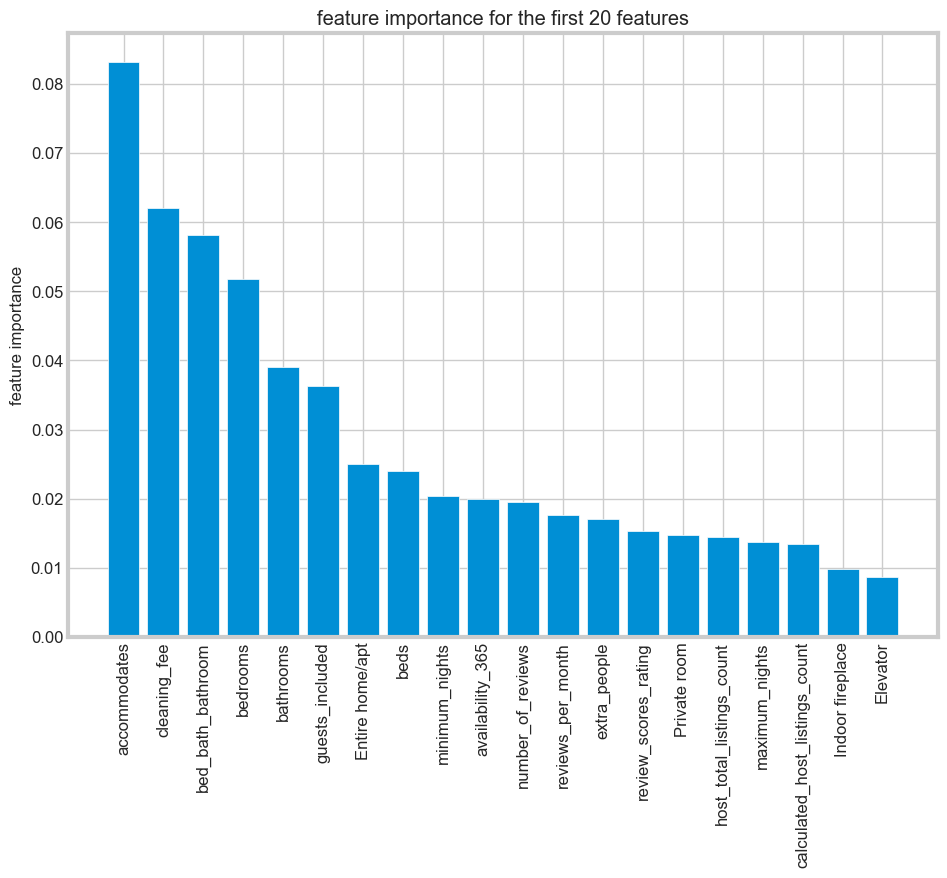

In [186]:
plt.figure(figsize=(10,8),dpi=100)
plt.bar(attribute[:20], height=coefficient[:20])
plt.xticks(rotation=90)
plt.ylabel('feature')
plt.ylabel('feature importance')
plt.title('feature importance for the first 20 features')
plt.show()

#### Conclusions from the feature importance bar plots:
 
1. number of beds, baths, and bedrooms are the most important features that determine the cost. This is not surprising! we could expect that an Airbnb price can be affected significantly by the number of beds and bath.
2. There are other factors which their effects on the price was predictable such as: accommodates, private room, guest_included, entire home/apartment.
3. Surprisingly, availability in a year and total host listing are among the important features.
4. Among all the locations, we only have downtown in the top 20 features which makes sense. Normally, prices are higher in the downtown area of Vancouver.

We should note that the feature importance only tells us which features are important in prediction of an Airbnb price. It does not tell us anything about how variation of a feature varies the price. 

**Important amenities**

In [167]:
#Create list of all amenities and their coefficient for plotting purposes
amenity= []
amn_coef = []
for feature in features:
    if feature[1] in all_amenities:
        amenity.append(feature[1])
        amn_coef.append(feature[0])

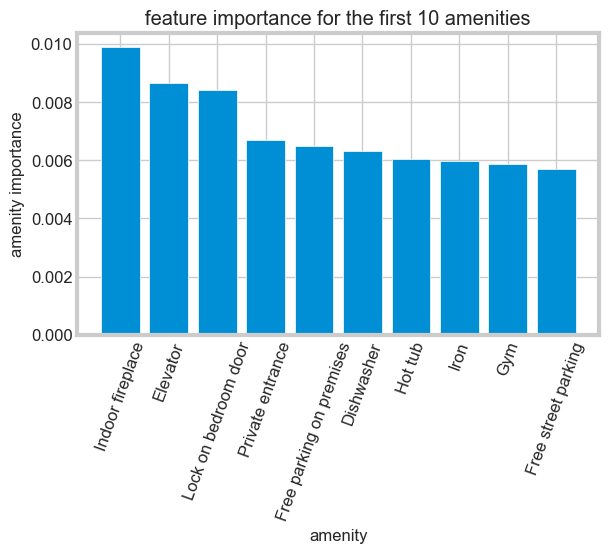

In [171]:
plt.figure(figsize=(6,4), dpi= 100)
plt.bar(amenity[:10], height=amn_coef[:10])
plt.xticks(rotation=70)
plt.xlabel('amenity')
plt.ylabel('amenity importance')
plt.title('feature importance for the first 10 amenities')
plt.show()

**Analysis for the bar plot of the first 10 important amenities:**

1. Renting a Family/kid friendly Airbnb is an important concern for most of families. Therefore, it makes sense that these features affect the price significantly compared to the listings which do not have this feature.
2. Indoor fireplace is an extra cost for the host of an Airbnb place. So, having this feature normally increases the price. The same logic will apply to the rest of the features in the first 10 important features except TV.
3. To support my point, we can see that Wi-Fi is not among the top 10. It is actually 68 in 123 available amenities. That's because almost all homes have Wi-Fi! It was expected that Wi-Fi would not affect the price significantly.